## Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data=data.dropna()

# dropping irrelevent columns
data.drop(['RowNumber','CustomerId','Surname'], inplace=True, axis=1)

In [3]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


In [5]:
# Handled Missing Values
data=data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


In [8]:
# encoding categorical data

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [9]:
# splitting the data into features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [10]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model building and training

In [12]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Model evaluation

In [14]:
# Logistic Regression
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8035
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1572
           1       0.65      0.17      0.27       428

    accuracy                           0.80      2000
   macro avg       0.73      0.57      0.58      2000
weighted avg       0.78      0.80      0.76      2000



In [15]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classifier Accuracy: 0.849
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1572
           1       0.75      0.44      0.56       428

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



## Confusion Matrix

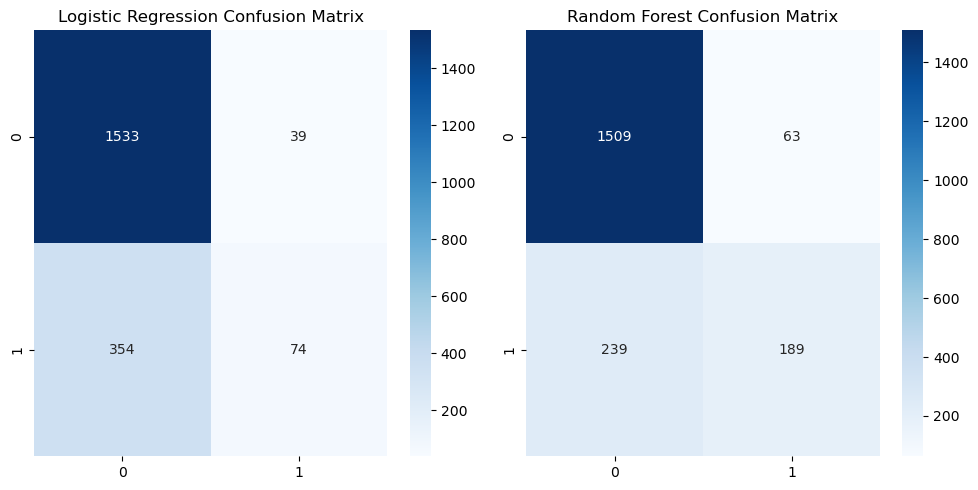

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()